
# Ocean Colour Remote Sensing and Data Analysis Course for ECOPs in Africa 
#### Lesson 2
<span style="color:brown; font-size:1.4em;font-style:italic">  -	Introduction to satellite data search and download methods </span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>


<span style="font-size:1.1em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button.   
Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Search and retrieve images from G-Portal](#3.-Search-and-retrieve-images-from-G-Portal)
- [4. Resources](#4.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

This exercise is preceeded by a presentation about [Access to Open Ocean Colour Data](https://classroom.oceanteacher.org/mod/book/view.php?id=18971&forceview=1#:~:text=Access%20to%20Open%20Ocean%20Colour%20Data) where detailed introduction is given on how to search and retrieve data from open data archives active centres (DAACs). 

Here, we focus on data retrieval of SGLI/GCOM-C data from JAXA's [G-Portal](https://gportal.jaxa.jp/gpr/) site. You will play with a Python code to retrieve the Level 2 data. 

As for tha data obtained from the NASA's [OceanColorWeb](https://oceancolor.gsfc.nasa.gov/), the website offers an easy way to place orders and download bulk data. 

***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for this activity   
If a module throws a `ModuleNotFoundError` try installing it with the command  
- `!conda install --channel "conda-forge" module` or with  
- `!pip install module`  

If you have a requirement file containing the names of the modules you want to install, use
- `!pip install -r requirements.txt`

Remove `!` if you run the command directly in your terminal or command prompt

In [1]:
# importing module
from datetime import datetime

- **Local modules**  

Include a local library (scripts) with custom fuctions.  

We use the `sys` module to append a directory to the list of known paths for interpreter to search.  
This allow us to import the custom functions or modules not in the search directories.

We also use the `Path` library to help us get the name of the current working directory.

In [2]:
# importing module
import sys
from pathlib import Path
  
# appending a path
cwd = Path.cwd()
sys.path.append(str(cwd.parent.parent))

In [3]:
import octutils as util

# 3. Search and retrieve images from G-Portal
[Return to the "Table of contents"](#Table-of-contents)

Inside `util` there is a function named `getfile`.  

Use `help` to get information on how to use the function

In [4]:
help(util.getfile)

Help on function getfile in module octutils:

getfile(bbox, start_date, end_date, output_dir=None, sensor='sgli', dtype='OC')
    :param bbox: bounding box (area of interest) e.g., (lon_min, lat_min, lon_max, lat_max)
                 Mozambique channel bbox (30, -30, 50, -10)
    :type bbox: tuple
    :param start_date: data search start date
    :type start_date: datetime
    :param end_date: data search end date
    :type end_date: datetime
    :param sensor: sensor name, currently only SGLI is support.
                   For NASA's supported sensor is easy to use the OceanColor Web to place data orders.
    :param output_dir: if output path is not specified, the current working directory is used.
                       A folder with the sensor name and `L2` appended is created and data is saved therein
    :type output_dir: Path
    :type sensor: str
    :param dtype: data type, OC - ocean colour or SST - sea surface temperature
    :type dtype: str
    :return: list of images with

In [5]:
# Define data retrieval params
start = datetime(2022, 5, 25)
end = start
bbox = 30, -30, 50, -10
sensor = 'sgli'
dtype = 'OC'

files = util.getfile(start_date=start, 
                     end_date=end, 
                     bbox=bbox, 
                     sensor=sensor, 
                     dtype=dtype)
print(f'Path: {files[0].parent}')
print('\n'.join(f.name for f in files))

Path: C:\Users\Eligio\Documents\My-Res\OceanDecade\ocean-colour-training-ecops-africa\Day2\data-download\data
GC1SG1_202205250725U16613_L2SG_IWPRQ_3000.h5
GC1SG1_202205250730D16614_L2SG_IWPRQ_3000.h5
GC1SG1_202205250734H16615_L2SG_IWPRQ_3000.h5


<div class="alert alert-block alert-warning"/div>
    <h3>Task</h3>
  
--- 
    
Use the materials introduced in [Access to Open Ocean Colour Data](https://classroom.oceanteacher.org/mod/book/view.php?id=18971&forceview=1#:~:text=Access%20to%20Open%20Ocean%20Colour%20Data) to find the dates with clear images in your area of interest.   
After that, run the above cell but now for SST by changing `dtype` with your own `bbox` and `start, end` dates.

### Bonus
We will use `h5py` and `Matplotlib` we read and display the downloaded data.   
The data in these `HDF5` files are stored as digital numbers.  
We need to scale them into geophysical values. This is achieved by applying the following expression.


- ${CHLA_{[mg\ m^{-3}]} = DN * Slope + offset}$  

where DN stands for digital number.

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import h5py

In [7]:
with h5py.File(files[1], mode='r') as h5:
    dn = h5['Image_data/CHLA'][:]
    attrs = dict(h5['Image_data/CHLA'].attrs)
    sds = dn * attrs.get('Slope')[0] + attrs.get('Offset')[0]
    
    print('"Image_data/CHLA" attributes\n', 
          '\n'.join(f'\t{key}: {val[0]}' for key, val in attrs.items()))

"Image_data/CHLA" attributes
 	Data_description: b'Chllorophyll-a concentration (CHLA) = DN * Slope + Offset [mg m^-3]'
	Dim0: b'Line grids'
	Dim1: b'Pixel grids'
	Error_DN: 65535
	Mask_for_statistics: 351
	Maximum_valid_DN: 65534
	Minimum_valid_DN: 0
	Offset: 0.0
	Slope: 0.0015999999595806003
	Unit: b'mg m^-3'


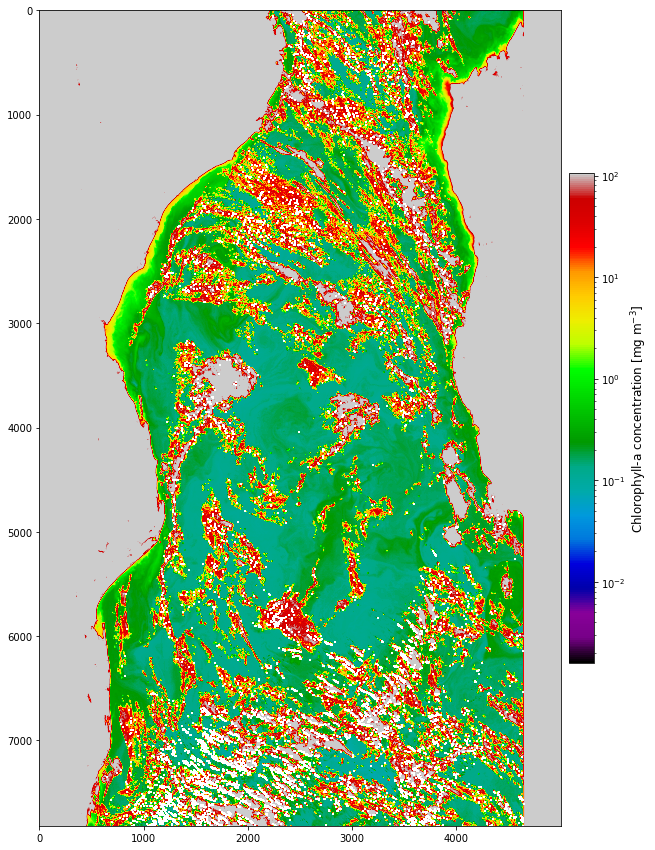

In [8]:
plt.figure(figsize=(15, 15))
m = plt.imshow(sds, cmap='nipy_spectral', norm=LogNorm())
cb = plt.colorbar(m, shrink=0.6, pad=0.01)
cb.set_label('Chlorophyll-a concentration [mg m$^{-3}$]', size=12)

<div class="alert alert-block alert-warning" /div>
    <h3>Task</h3>
    
--- 
    
Try displaying the SST image obtained in your area of interest.  
To know where the SST data is found inside the `HDF5` files inspect the keys found in the file.   
Use  
    
```python
print(h5['Image_data'].keys())
``` 
    
to get the names of variables found in `Image_data`. 
```python
print(dict(h5['Image_data/key'].attrs))
```  
Prints the attributes associated with a given variable.

Q: What difficulties did you encounter downloading and displaying the image?

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other sensors of your chosing.
    We hope you are enjoying the training provided by ECOPs for ECOPs.

# 4. Resources
[Go back to the "Table of contents"](#Table-of-contents)

1. [SGLI/GCOM-C](https://global.jaxa.jp/projects/sat/gcom_c/)
2. [SGLI/GCOM-C Data Users Handbook](https://gportal.jaxa.jp/gpr/assets/mng_upload/GCOM-C/GCOM-C_SHIKISAI_Data_Users_Handbook_en.pdf)
3. [GCOM-C/SGLI Sea Surface Temperature (SST) ATBD](https://suzaku.eorc.jaxa.jp/GCOM_C/data/ATBD/ver2/V2ATBD_O1AB_SST_Kurihara_r1.pdf)
3. [ECOPs Ocean Colour Training](https://github.com/Elgyii/ocean-colour-training-ecops-africa)